In [ ]:
!pip install torch torchvision torchaudio
!pip install git+https://github.com/openai/CLIP.git
!pip install matplotlib



In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import clip  # OpenAI's CLIP
from tqdm import tqdm

# Check device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load CLIP model and preprocessing
clip_model, _ = clip.load("ViT-B/32", device=device)

# Custom transform to 128x128 + CLIP normalization
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073),
                         (0.26862954, 0.26130258, 0.27577711))
])

# Replace this with your dataset path
data_dir = "C:/Users/shazi/OneDrive/Desktop/VS Code/fyp/skintypepatches 128x128"  # example: "dataset/"

# Load dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Create DataLoaders
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Print class names
print("Classes:", dataset.classes)

# Freeze CLIP vision encoder layers
for param in clip_model.visual.parameters():
    param.requires_grad = False

# Build the model using CLIP ViT encoder
class CLIPSkinClassifier(nn.Module):
    def __init__(self, clip_model, num_classes=3):
        super(CLIPSkinClassifier, self).__init__()
        self.encoder = clip_model.visual
        self.classifier = nn.Sequential(
            nn.Linear(self.encoder.output_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        features = self.encoder(x)
        logits = self.classifier(features)
        return logits

# Initialize model
model = CLIPSkinClassifier(clip_model, num_classes=3).to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training loop
def train_model(model, dataloader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        loop = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}")
        for images, labels in loop:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Metrics
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            loop.set_postfix(loss=loss.item(), acc=100. * correct / total)

        print(f"Epoch {epoch+1}: Loss={running_loss/len(dataloader):.4f}, Accuracy={100. * correct/total:.2f}%")

# Train
train_model(model, train_loader, criterion, optimizer, epochs=10)


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import clip  # OpenAI's CLIP
from tqdm import tqdm

# Check device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load CLIP model and preprocessing
clip_model, _ = clip.load("ViT-B/32", device=device)

# Custom transform to 128x128 + CLIP normalization
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073),
                         (0.26862954, 0.26130258, 0.27577711))
])

# Your dataset path
data_dir = "C:/Users/shazi/OneDrive/Desktop/VS Code/fyp/skintypepatches 128x128"

# Load dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Create DataLoader
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Print class names
print("Classes:", dataset.classes)

# Freeze CLIP vision encoder layers
for param in clip_model.visual.parameters():
    param.requires_grad = False

# Build model with CLIP ViT encoder
class CLIPSkinClassifier(nn.Module):
    def __init__(self, clip_model, num_classes=3):
        super(CLIPSkinClassifier, self).__init__()
        self.encoder = clip_model.visual
        self.classifier = nn.Sequential(
            nn.Linear(self.encoder.output_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = x.half()  # Ensure input is float16
        features = self.encoder(x)
        logits = self.classifier(features)
        return logits

# Initialize model and convert to half precision
model = CLIPSkinClassifier(clip_model, num_classes=3).to(device).half()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training loop
def train_model(model, dataloader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        loop = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}")
        for images, labels in loop:
            images = images.to(device).half()  # Match input type to model (float16)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Metrics
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            loop.set_postfix(loss=loss.item(), acc=100. * correct / total)

        print(f"Epoch {epoch+1}: Loss={running_loss/len(dataloader):.4f}, Accuracy={100. * correct/total:.2f}%")

# Train the model
train_model(model, train_loader, criterion, optimizer, epochs=10)


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import clip  # OpenAI's CLIP
from tqdm import tqdm

# Check device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load CLIP model and preprocessing
clip_model, _ = clip.load("ViT-B/32", device=device)

# Custom transform to 224x224 + CLIP normalization (corrected size)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 for CLIP compatibility
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073),
                         (0.26862954, 0.26130258, 0.27577711))
])

# Replace this with your dataset path
data_dir = r"C:\Users\shazi\OneDrive\Desktop\VS Code\fyp\skintypepatches 128x128"  # example: "dataset/"

# Load dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Create DataLoaders
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Print class names
print("Classes:", dataset.classes)

# Freeze CLIP vision encoder layers
for param in clip_model.visual.parameters():
    param.requires_grad = False

# Build the model using CLIP ViT encoder
class CLIPSkinClassifier(nn.Module):
    def __init__(self, clip_model, num_classes=3):
        super(CLIPSkinClassifier, self).__init__()
        self.encoder = clip_model.visual
        self.classifier = nn.Sequential(
            nn.Linear(self.encoder.output_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        features = self.encoder(x)
        logits = self.classifier(features)
        return logits

# Initialize model
model = CLIPSkinClassifier(clip_model, num_classes=3).to(device).float()  # Ensure model is in float32

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training loop
def train_model(model, dataloader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        loop = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}")
        for images, labels in tqdm(loop):
            images, labels = images.to(device).float(), labels.to(device)  # Ensure input is in float32

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Metrics
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            loop.set_postfix(loss=loss.item(), acc=100. * correct / total)

        print(f"Epoch {epoch+1}: Loss={running_loss/len(dataloader):.4f}, Accuracy={100. * correct/total:.2f}%")

# Train
train_model(model, train_loader, criterion, optimizer, epochs=10)


DNN

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import clip

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load CLIP model
clip_model, preprocess_clip = clip.load("ViT-B/32", device=device)
clip_model.eval()  # We won't fine-tune CLIP itself

# Dataset path
data_dir = 'stage1patches'

# Add slight augmentation to training set
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    preprocess_clip,
])

# Use only CLIP's transform for validation
val_transform = preprocess_clip

# Load dataset
full_dataset = datasets.ImageFolder(data_dir)
class_names = full_dataset.classes
print(f"Classes: {class_names}")

# Manual split with transforms applied
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_data, val_data = torch.utils.data.random_split(full_dataset, [train_size, val_size])

train_data.dataset.transform = train_transform
val_data.dataset.transform = val_transform

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False, num_workers=4)

# Feature extractor from CLIP (used inside training loop)
def extract_features(model, images):
    with torch.no_grad():
        return model.encode_image(images).float()

# Improved classifier
class MLPClassifier(nn.Module):
    def __init__(self, input_dim=512, num_classes=3):
        super(MLPClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.classifier(x)

# Initialize classifier
model = MLPClassifier(input_dim=512, num_classes=len(class_names)).to(device)

# Loss, optimizer, scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=5, verbose=True)

# Training loop
best_acc = 0.0
epochs = 100
for epoch in range(epochs):
    model.train()
    total_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        features = extract_features(clip_model, images)

        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Validation
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            features = extract_features(clip_model, images)
            outputs = model(features)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    acc = correct / total
    scheduler.step(acc)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss:.4f} - Val Acc: {acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        torch.save(model.state_dict(), "best_model.pth")

    if acc >= 0.96:
        print("🎯 Target accuracy of 96% reached! Stopping early.")
        break


Batch 8 all param

C:\Users\shazi\AppData\Local\Temp\ipykernel_18656\3267243936.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Epoch', y='Train Acc', hue='Batch Size', ci=None, palette=batch_palette, linestyle='-')
C:\Users\shazi\AppData\Local\Temp\ipykernel_18656\3267243936.py:19: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.lineplot(data=df, x='Epoch', y='Train Acc', hue='Batch Size', ci=None, palette=batch_palette, linestyle='-')
C:\Users\shazi\AppData\Local\Temp\ipykernel_18656\3267243936.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Epoch', y='Test Acc', hue='Batch Size', ci=None, palette=batch_palette, linestyle='--', legend=False)
C:\Users\shazi\AppData\Local\Temp\ipykernel_18656\3267243936.py:20: UserWarning: The palette list has more values (9) than needed (5), which may not be inten

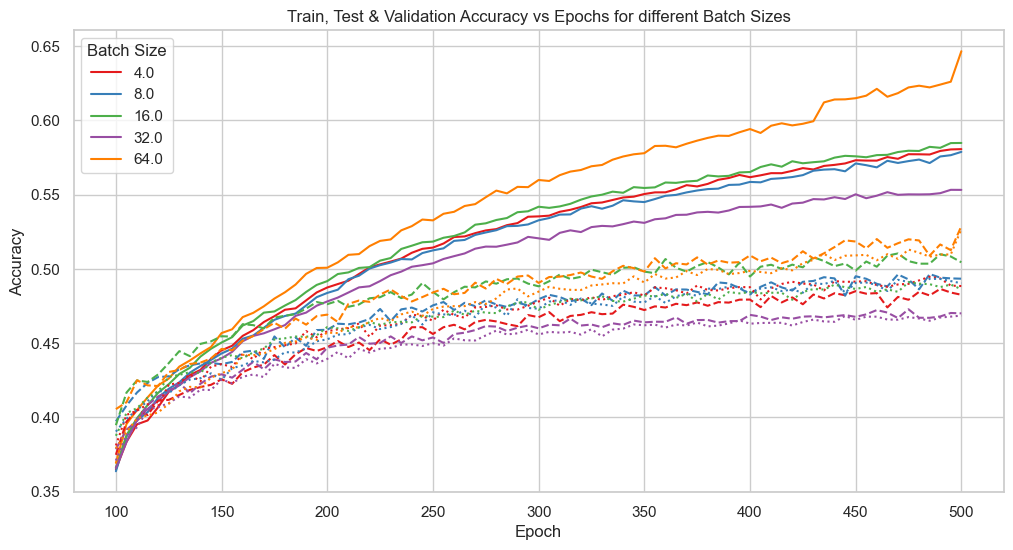

C:\Users\shazi\AppData\Local\Temp\ipykernel_18656\3267243936.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Epoch', y='Train Acc', hue='Learning Rate', ci=None, palette=lr_palette, linestyle='-')
C:\Users\shazi\AppData\Local\Temp\ipykernel_18656\3267243936.py:29: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.lineplot(data=df, x='Epoch', y='Train Acc', hue='Learning Rate', ci=None, palette=lr_palette, linestyle='-')
C:\Users\shazi\AppData\Local\Temp\ipykernel_18656\3267243936.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Epoch', y='Test Acc', hue='Learning Rate', ci=None, palette=lr_palette, linestyle='--', legend=False)
C:\Users\shazi\AppData\Local\Temp\ipykernel_18656\3267243936.py:30: UserWarning: The palette list has more values (8) than needed (5), which may not be inten

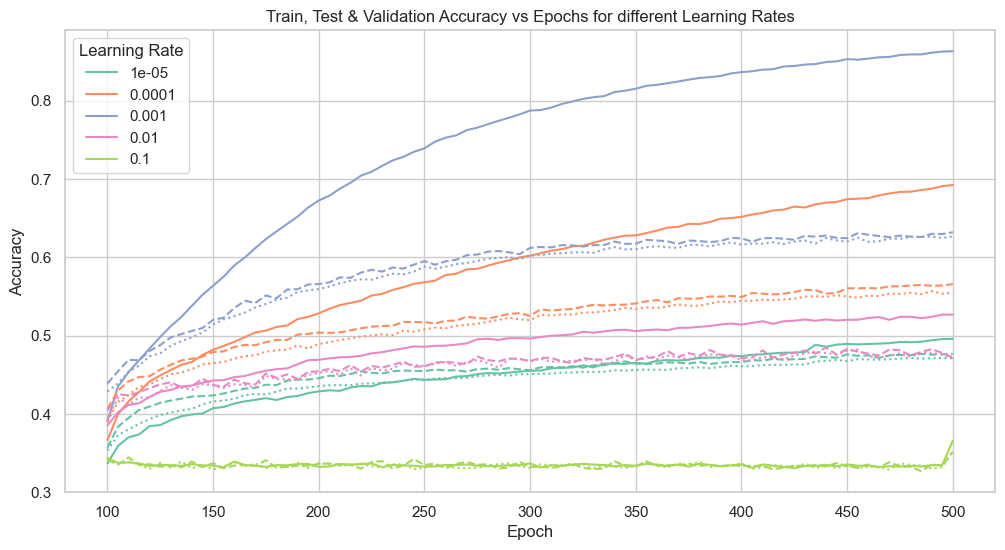

C:\Users\shazi\AppData\Local\Temp\ipykernel_18656\3267243936.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Epoch', y='Train Acc', hue='Optimizer', ci=None, palette=optimizer_palette, linestyle='-')
C:\Users\shazi\AppData\Local\Temp\ipykernel_18656\3267243936.py:39: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.lineplot(data=df, x='Epoch', y='Train Acc', hue='Optimizer', ci=None, palette=optimizer_palette, linestyle='-')
C:\Users\shazi\AppData\Local\Temp\ipykernel_18656\3267243936.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Epoch', y='Test Acc', hue='Optimizer', ci=None, palette=optimizer_palette, linestyle='--', legend=False)
C:\Users\shazi\AppData\Local\Temp\ipykernel_18656\3267243936.py:40: UserWarning: The palette list has more values (8) than needed (5), which may not

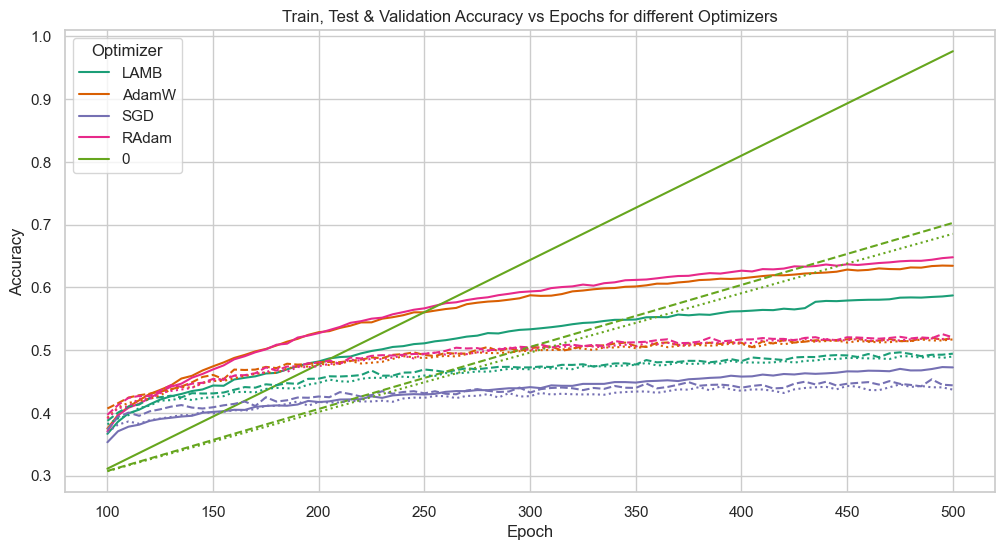

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file
file_path = r"C:\Users\shazi\OneDrive\Desktop\VS Code\fyp\Sample testing\All Parameter Testing\All batches parameter testing.csv"
df = pd.read_csv(file_path)

# Set Seaborn theme
sns.set(style="whitegrid")

# Custom color palettes (you can edit these)
batch_palette = sns.color_palette("Set1")
lr_palette = sns.color_palette("Set2")
optimizer_palette = sns.color_palette("Dark2")

# 1️⃣ Accuracies on different Batch Sizes over Epochs
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Epoch', y='Train Acc', hue='Batch Size', ci=None, palette=batch_palette, linestyle='-')
sns.lineplot(data=df, x='Epoch', y='Test Acc', hue='Batch Size', ci=None, palette=batch_palette, linestyle='--', legend=False)
sns.lineplot(data=df, x='Epoch', y='Val Acc', hue='Batch Size', ci=None, palette=batch_palette, linestyle=':', legend=False)
plt.title('Train, Test & Validation Accuracy vs Epochs for different Batch Sizes')
plt.ylabel('Accuracy')
plt.legend(title='Batch Size')
plt.show()

# 2️⃣ Accuracies on different Learning Rates over Epochs
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Epoch', y='Train Acc', hue='Learning Rate', ci=None, palette=lr_palette, linestyle='-')
sns.lineplot(data=df, x='Epoch', y='Test Acc', hue='Learning Rate', ci=None, palette=lr_palette, linestyle='--', legend=False)
sns.lineplot(data=df, x='Epoch', y='Val Acc', hue='Learning Rate', ci=None, palette=lr_palette, linestyle=':', legend=False)
plt.title('Train, Test & Validation Accuracy vs Epochs for different Learning Rates')
plt.ylabel('Accuracy')
plt.legend(title='Learning Rate')
plt.show()

# 3️⃣ Accuracies on different Optimizers over Epochs
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Epoch', y='Train Acc', hue='Optimizer', ci=None, palette=optimizer_palette, linestyle='-')
sns.lineplot(data=df, x='Epoch', y='Test Acc', hue='Optimizer', ci=None, palette=optimizer_palette, linestyle='--', legend=False)
sns.lineplot(data=df, x='Epoch', y='Val Acc', hue='Optimizer', ci=None, palette=optimizer_palette, linestyle=':', legend=False)
plt.title('Train, Test & Validation Accuracy vs Epochs for different Optimizers')
plt.ylabel('Accuracy')
plt.legend(title='Optimizer')
plt.show()


[ 4.  8. 16. 32. 64. nan]


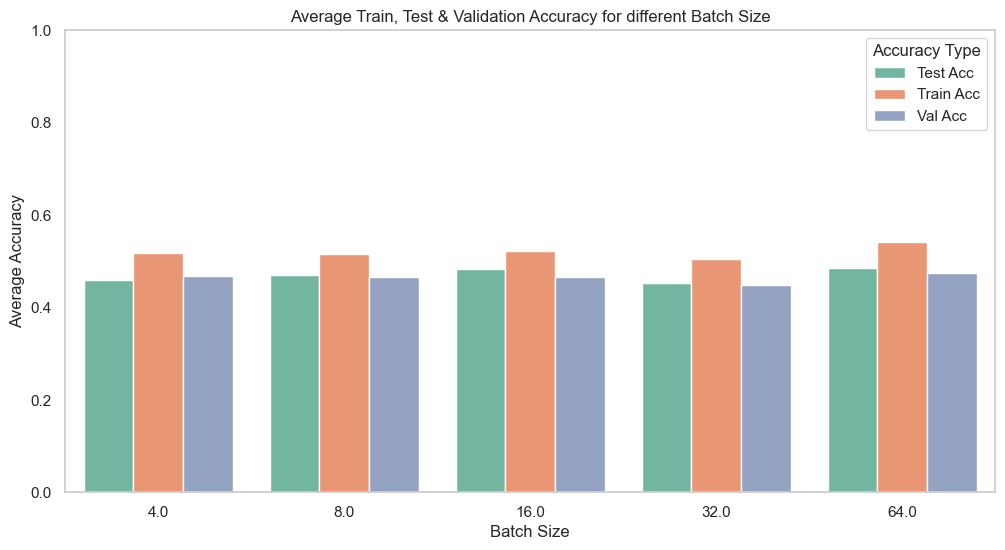

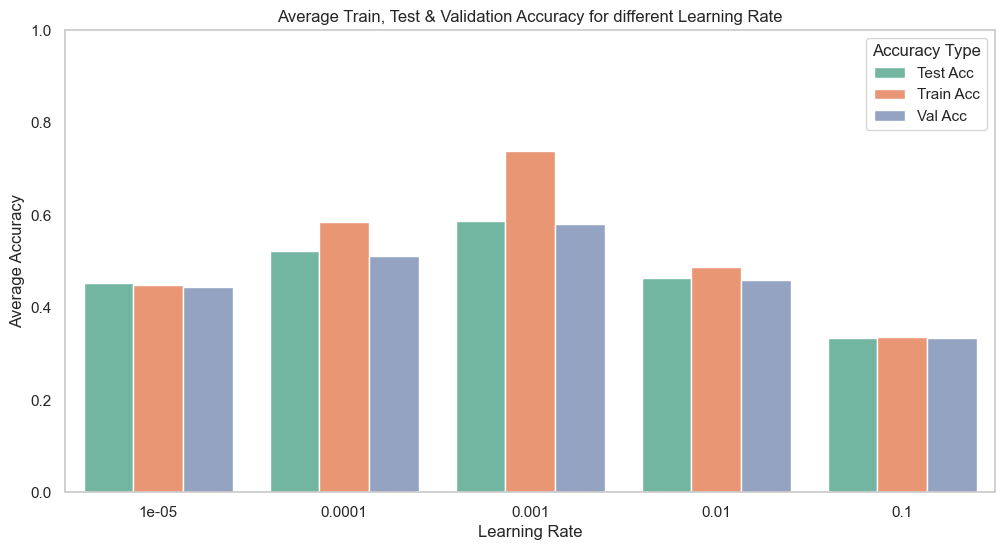

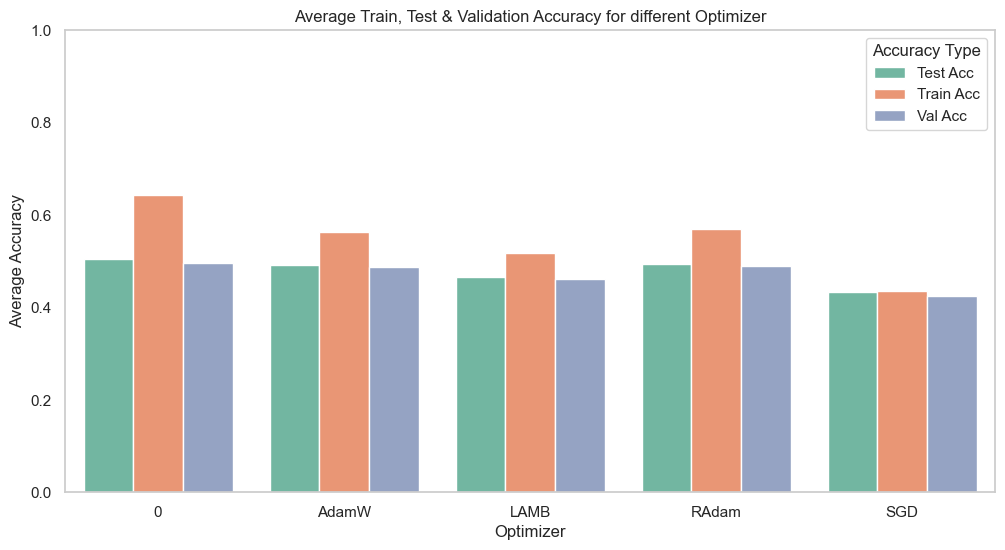

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
file_path = r"C:\Users\shazi\OneDrive\Desktop\VS Code\fyp\Sample testing\All Parameter Testing\All batches parameter testing.csv"
df = pd.read_csv(file_path)
print(df['Batch Size'].unique())

# Set Seaborn theme
sns.set(style="whitegrid")

# Function to melt dataframe for plotting
def melt_accuracy(df, value_vars):
    return pd.melt(df, 
                   id_vars=['Epoch', 'Batch Size', 'Learning Rate', 'Optimizer'],
                   value_vars=value_vars, 
                   var_name='Accuracy Type', 
                   value_name='Accuracy')

# Function to plot average accuracies as barplot for a given parameter
def barplot_acc(param, palette):
    df_melted = melt_accuracy(df, ['Train Acc', 'Test Acc', 'Val Acc'])
    
    # Group by parameter and accuracy type, then average
    avg_df = df_melted.groupby([param, 'Accuracy Type']).mean(numeric_only=True).reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=avg_df, 
                x=param, y='Accuracy', hue='Accuracy Type', 
                palette='Set2')
    plt.title(f'Average Train, Test & Validation Accuracy for different {param}')
    plt.ylabel('Average Accuracy')
    plt.ylim(0, 1)
    plt.legend(title='Accuracy Type')
    plt.grid(axis='y')
    plt.show()

# 1️⃣ Barplot for Batch Size
barplot_acc('Batch Size', 'Set1')

# 2️⃣ Barplot for Learning Rate
barplot_acc('Learning Rate', 'Set2')

# 3️⃣ Barplot for Optimizer
barplot_acc('Optimizer', 'Dark2')


[ 4  8 16 32 64]
0
Epoch        0
Optimizer    0
Train Acc    0
Test Acc     0
Val Acc      0
dtype: int64


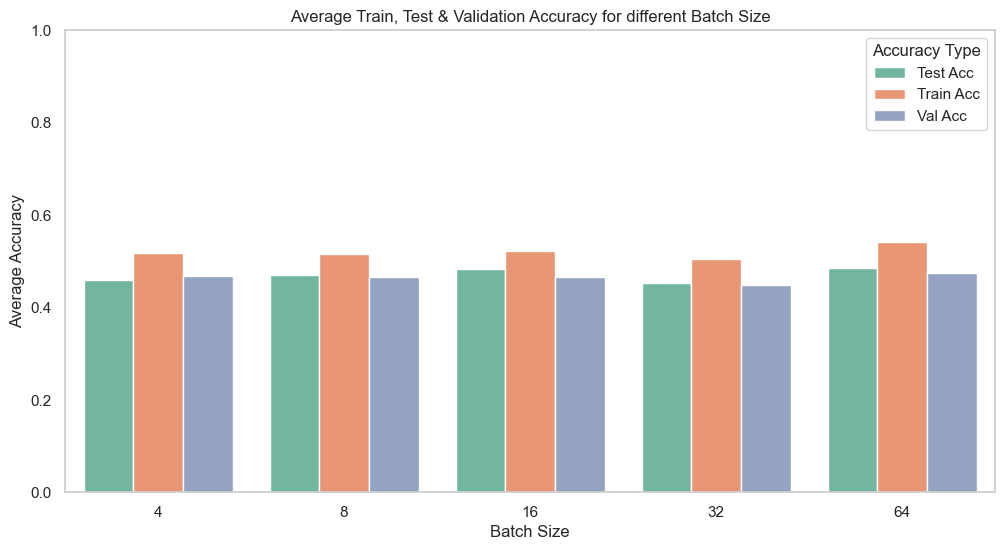

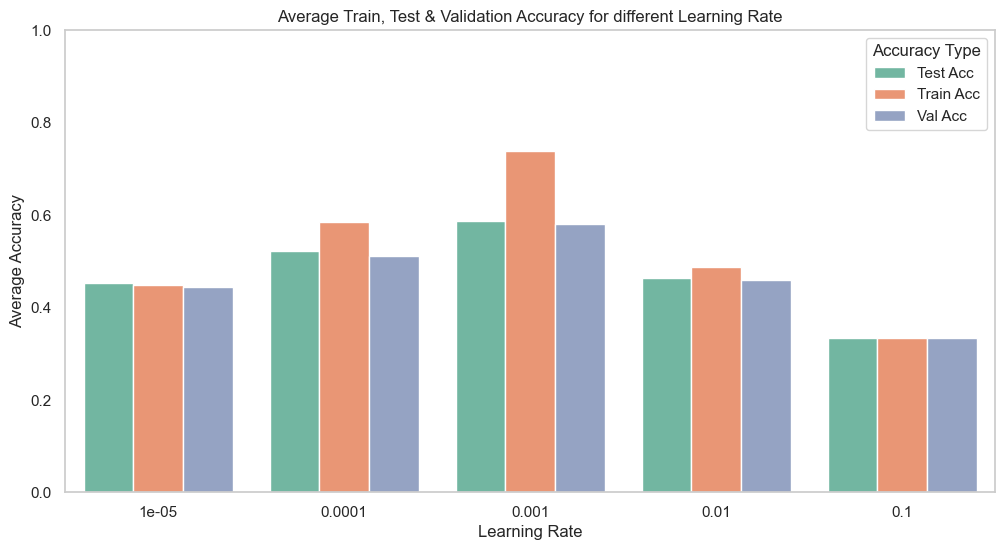

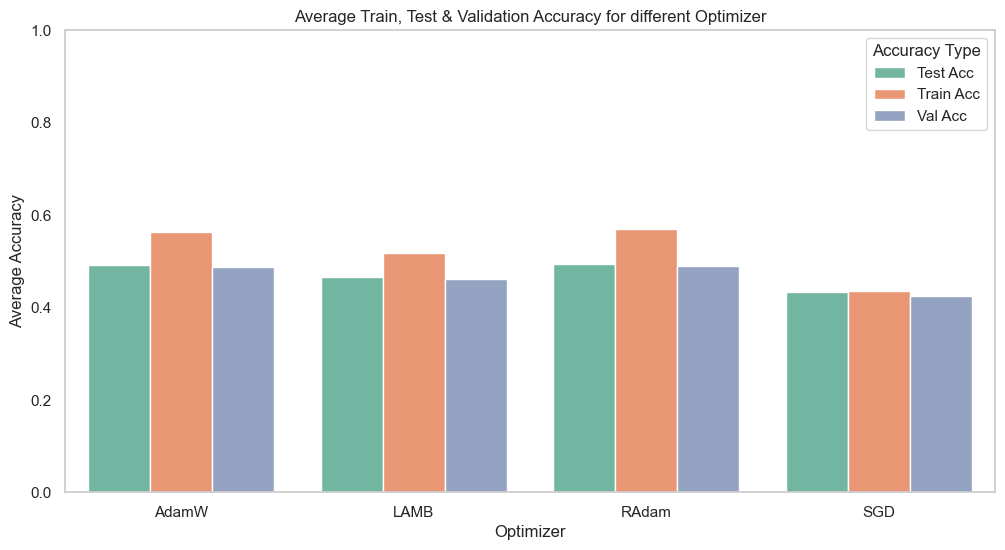

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
file_path = r"C:\Users\shazi\OneDrive\Desktop\VS Code\fyp\Sample testing\All Parameter Testing\All batches parameter testing.csv"
df = pd.read_csv(file_path)
print(df['Batch Size'].unique())
print(df['Optimizer'].isna().sum())

# Check for missing accuracy values
print(df[['Epoch', 'Optimizer', 'Train Acc', 'Test Acc', 'Val Acc']].isna().sum())

# Set Seaborn theme
sns.set(style="whitegrid")

# Function to melt dataframe for plotting
def melt_accuracy(df, value_vars):
    return pd.melt(df, 
                   id_vars=['Batch Size', 'Learning Rate', 'Optimizer'],
                   value_vars=value_vars, 
                   var_name='Accuracy Type', 
                   value_name='Accuracy')

# Function to plot average accuracies as barplot for a given parameter
def barplot_acc(param, palette):
    df_melted = melt_accuracy(df, ['Train Acc', 'Test Acc', 'Val Acc'])
    
    # Group by parameter and accuracy type, then average
    avg_df = df_melted.groupby([param, 'Accuracy Type']).mean(numeric_only=True).reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=avg_df, 
                x=param, y='Accuracy', hue='Accuracy Type', 
                palette='Set2')
    plt.title(f'Average Train, Test & Validation Accuracy for different {param}')
    plt.ylabel('Average Accuracy')
    plt.ylim(0, 1)
    plt.legend(title='Accuracy Type')
    plt.grid(axis='y')
    plt.show()

# 1️⃣ Barplot for Batch Size
barplot_acc('Batch Size', 'Set1')

# 2️⃣ Barplot for Learning Rate
barplot_acc('Learning Rate', 'Set2')

# 3️⃣ Barplot for Optimizer
barplot_acc('Optimizer', 'Dark2')
